##

In [1]:
import mysql.connector

# Connect to MySQL Server

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="datascience"
)

# Creating Database

In [10]:
#Create a Database "Company"
mycurso = mydb.cursor()
mycurso.execute("CREATE DATABASE Company")

In [6]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="datascience",
  database="Company"
)

# Creating Tables

In [11]:
#Create Table for CATEGORY
mycurso.execute("Create Table CATEGORY (CatID int NOT NULL, CatName varchar(100), PRIMARY KEY (CatID))")

In [12]:
#Create Table for DEPARTMENT
mycurso.execute("Create Table DEPARTMENT (DeptID int NOT NULL, DeptName varchar(100), DeptCode int, Category_fk int, PRIMARY KEY (DeptID), FOREIGN KEY (Category_fk) REFERENCES Category(CatID))")

In [13]:
#Create Table for REVENUE
mycurso.execute("Create Table REVENUE (RevID int NOT NULL, Year int, Month varchar(20), Amount_In_Kobo int, Dept_fk int, PRIMARY KEY (RevID), FOREIGN KEY (Dept_fk) REFERENCES Department(DeptID))")

# Inserting Data into Tables

In [15]:
#Insert Data into CATEGORY
sql = "insert into CATEGORY (CatID, CatName) VALUES (%s, %s)"
val = [
  ('51', 'ICT'),
  ('52', 'UTILITY'),
  ('53', 'WELFARE'),
  ('54', 'ACCOUNTS AND LAW'),
  ('55', 'EDUCATION')
]

mycurso.executemany(sql, val)
mydb.commit()

In [16]:
#Insert Data into DEPARTMENT

sql = "insert into DEPARTMENT (DeptID, DeptName, DeptCode, Category_fk) VALUES (%s,%s,%s,%s)"
val = [
    ('1', 'PRINTING DEPT', '23013001', '53'),
    ('2', 'INDISCIPLINE DEPT', '23013002', '53'),
    ('3', 'HUMAN RESOURCES DEPT', '23013003', '53'),
    ('4', 'MARKETING DEPT', '23013004', '54'),
    ('5', 'ACCOUNTING DEPT', '23013005', '54'),
    ('6', 'NON - FORMAL EDUCATION DEPT', '23013006', '55'),
    ('7', 'FORMAL EDUCATION DEPT', '23013007', '55'),
    ('8', 'CYBER DEPT', '23013008', '51'),
    ('9', 'LAW REVIEW AND REFORM', '23013009', '54'),
    ('10', 'ICT DEPT', '23013010', '51'),
    ('11', 'LIBRARY DEPT', '23013011', '55'),
    ('12', 'UTILITY DEPT', '23013012', '52')
]

mycurso.executemany(sql, val)
mydb.commit()

In [17]:
#Insert Data into REVENUE

sql = "insert into REVENUE (RevID, Year, Month, Amount_In_Kobo, Dept_fk) VALUES (%s,%s,%s,%s,%s)"
val=[
    ('1', '2018', 'Jan', '50000000', '1'),
    ('2', '2018', 'Feb', '150000000', '1'),
    ('3', '2018', 'Mar', '5000000', '1'),
    ('4', '2018', 'Mar', '90000000', '1'),
    ('5', '2018', 'Mar', '4500000', '4'),
    ('6', '2018', 'Mar', '5600000', '1'),
    ('7', '2018', 'Jun', '7800000', '3'),
    ('8', '2018', 'Jun', '9078880', '5'),
    ('9', '2018', 'Jun', '45000000', '5'),
    ('10', '2018', 'Sept', '345000000', '5'),
    ('11', '2018', 'Dec', '87000000', '6'),
    ('12', '2019', 'Dec', '63000000', '5'),
    ('13', '2019', 'Dec', '56200000', '5'),
    ('14', '2019', 'Dec', '763000000', '9'),
    ('15', '2019', 'Apr', '80090000', '8'),
    ('16', '2019', 'May', '43200000', '11'),
    ('17', '2019', 'Jun', '87300000', '6')
]

mycurso.executemany(sql, val)
mydb.commit()

# Answering Assesment Questions

In [18]:
# b. Which Department made the most revenue(naira) in 2018?
# To do this, I will extract the 'Revenue' table from the database and turn it into a dataframe using pandas

import pandas as pd

query = "SELECT * FROM REVENUE"
df = pd.read_sql(query, mydb)
df.head(10)

,RevID,Year,Month,Amount_In_Kobo,Dept_fk
0,1,2018,Jan,50000000,1
1,2,2018,Feb,150000000,1
2,3,2018,Mar,5000000,1
3,4,2018,Mar,90000000,1
4,5,2018,Mar,4500000,4
5,6,2018,Mar,5600000,1
6,7,2018,Jun,7800000,3
7,8,2018,Jun,9078880,5
8,9,2018,Jun,45000000,5
9,10,2018,Sept,345000000,5


In [19]:
#The table has been converted to a dataframe, now I will make a new column called 'Amount_In_Naira' 
#because the question asks for the department with the most revenue in "naira"
#I will divide the 'Amount_In_Kobo' column by 100 because 100 kobo = 1 naira
df['Amount_In_Naira'] = df['Amount_In_Kobo'] / 100
df.head(10)

,RevID,Year,Month,Amount_In_Kobo,Dept_fk,Amount_In_Naira
0,1,2018,Jan,50000000,1,500000.0
1,2,2018,Feb,150000000,1,1500000.0
2,3,2018,Mar,5000000,1,50000.0
3,4,2018,Mar,90000000,1,900000.0
4,5,2018,Mar,4500000,4,45000.0
5,6,2018,Mar,5600000,1,56000.0
6,7,2018,Jun,7800000,3,78000.0
7,8,2018,Jun,9078880,5,90788.8
8,9,2018,Jun,45000000,5,450000.0
9,10,2018,Sept,345000000,5,3450000.0


In [ ]:
#I can now drop the 'Amount_In_Kobo column 
#because I will only use the 'Amount_In_Naira' column to estimate to revenue
df.drop('Amount_In_Kobo', inplace=True, axis=1)

In [22]:
df.head()

,RevID,Year,Month,Dept_fk,Amount_In_Naira
0,1,2018,Jan,1,500000.0
1,2,2018,Feb,1,1500000.0
2,3,2018,Mar,1,50000.0
3,4,2018,Mar,1,900000.0
4,5,2018,Mar,4,45000.0


In [23]:
#In this dataframe, I will also convert the 'Amount_In_Naira' values to smaller values for visualization purposes
#This will be done by dividing the Revenues by 10000 
df['Amount_In_Naira (10,000s)'] = df['Amount_In_Naira'] / 10000
df.head(10)

,RevID,Year,Month,Dept_fk,Amount_In_Naira,"Amount_In_Naira (10,000s)"
0,1,2018,Jan,1,500000.0,50.00000
1,2,2018,Feb,1,1500000.0,150.00000
2,3,2018,Mar,1,50000.0,5.00000
3,4,2018,Mar,1,900000.0,90.00000
4,5,2018,Mar,4,45000.0,4.50000
5,6,2018,Mar,1,56000.0,5.60000
6,7,2018,Jun,3,78000.0,7.80000
7,8,2018,Jun,5,90788.8,9.07888
8,9,2018,Jun,5,450000.0,45.00000
9,10,2018,Sept,5,3450000.0,345.00000


In [24]:
#I will drop the 'Amount_In_Naira' column since I have derived a new one

df.drop('Amount_In_Naira', inplace=True, axis=1)
df.head(10)

,RevID,Year,Month,Dept_fk,"Amount_In_Naira (10,000s)"
0,1,2018,Jan,1,50.00000
1,2,2018,Feb,1,150.00000
2,3,2018,Mar,1,5.00000
3,4,2018,Mar,1,90.00000
4,5,2018,Mar,4,4.50000
5,6,2018,Mar,1,5.60000
6,7,2018,Jun,3,7.80000
7,8,2018,Jun,5,9.07888
8,9,2018,Jun,5,45.00000
9,10,2018,Sept,5,345.00000


In [25]:
# 'Year' and 'Dept_fk' are seen as integers so I will convert them to objects
#'Dept_fk' especially is not an integer from the original database schema 
#but because it is a foreign key, it uses the ID which is numerical 
#It requires a change to an object in order to plot the graph efficiently

df['Year']=df['Year'].apply(str)
df['Dept_fk']=df['Dept_fk'].apply(str)
df.head(20)

,RevID,Year,Month,Dept_fk,"Amount_In_Naira (10,000s)"
0,1,2018,Jan,1,50.00000
1,2,2018,Feb,1,150.00000
2,3,2018,Mar,1,5.00000
3,4,2018,Mar,1,90.00000
4,5,2018,Mar,4,4.50000
5,6,2018,Mar,1,5.60000
6,7,2018,Jun,3,7.80000
7,8,2018,Jun,5,9.07888
8,9,2018,Jun,5,45.00000
9,10,2018,Sept,5,345.00000


In [28]:
df.rename(columns = {'Amount_In_Naira (10,000s)':'Amount_Naira_10000s'}, inplace =True)

In [46]:
#Since the first question asks what department made the most revenue in 2018
#i will only take the data which were recorded in 2018

df2018=df[df['Year']=='2018']
df2018.head(11)

,RevID,Year,Month,Dept_fk,Amount_Naira_10000s
0,1,2018,Jan,1,50.00000
1,2,2018,Feb,1,150.00000
2,3,2018,Mar,1,5.00000
3,4,2018,Mar,1,90.00000
4,5,2018,Mar,4,4.50000
5,6,2018,Mar,1,5.60000
6,7,2018,Jun,3,7.80000
7,8,2018,Jun,5,9.07888
8,9,2018,Jun,5,45.00000
9,10,2018,Sept,5,345.00000


# Graphical Representaion

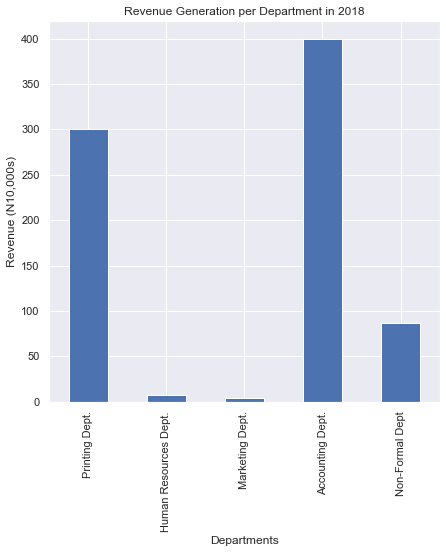

In [64]:
#I will import the relevant libraries for data visualization
#I will then use a bar plot to visualize the Revenue Generation per Department in 2018

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style='darkgrid')

plt.figure(figsize=(7,7))
df2018.groupby(['Dept_fk']).Amount_Naira_10000s.sum().plot.bar()
plt.title('Revenue Generation per Department in 2018')
plt.xlabel('Departments')
plt.ylabel('Revenue (N10,000s)')
#In the original dataset 1 = Printing Dept, 2= Indiscipline Dept, etc. 
#This has been encoded on the graphs as it is not encoded in the dataframe 
plt.xticks(ticks=[0,1,2,3,4],labels=['Printing Dept.','Human Resources Dept.','Marketing Dept.','Accounting Dept.','Non-Formal Dept']);

# Answer For 2b.

It can be seen from the graph above that in 2018, the Accounting Department generated the most revenue
= (~ N4,000,000)

Text(0.5, 1.0, 'Revenue Generation for Months')

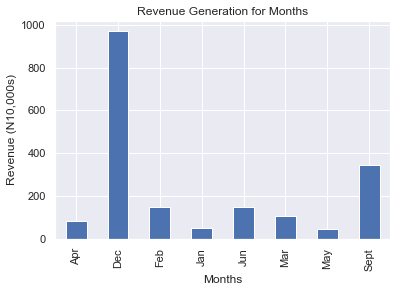

In [71]:
#2c. Which month had the most revenue made?
#I will then use a bar plot to visualize the Revenue Generation for Months

plt.figure(figsize=(6,4))
df.groupby(['Month']).Amount_Naira_10000s.sum().plot.bar()
plt.xlabel('Months')
plt.ylabel('Revenue (N10,000s)')
plt.title('Revenue Generation for Months')

# Answer for 2c.

From the figure above, the month of December had the most revenue = (N9,692,000)